In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


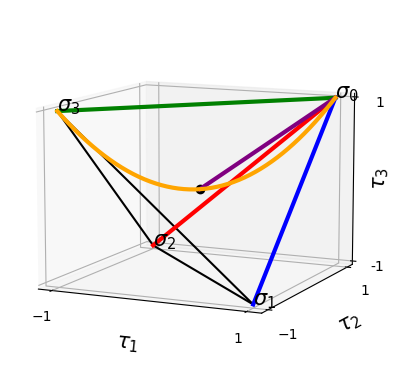

In [60]:
fig = plt.figure()
ax = plt.axes(projection='3d')
        
ax.plot([1,1],[1,-1],[1,-1],'k')
ax.plot([1,-1],[1,1],[1,-1],'k--')
ax.plot([1,-1],[1,-1],[1,1],'k')
ax.plot([-1,1],[1,-1],[-1,-1],'k')
ax.plot([-1,-1],[1,-1],[-1,1],'k')
ax.plot([1,-1],[-1,-1],[-1,1],'k')
    #     plt.plot(0,0,0,'ko')

ax.text(1,1,1,'$\sigma_0$',size=15)
ax.text(1,-1,-1,'$\sigma_1$',size=15)
ax.text(-1,1,-1,'$\sigma_2$',size=15)
ax.text(-1,-1,1,'$\sigma_3$',size=15)
plt.plot(0,0,0,'ko')
#     ax.text(0,0,0,'O',size=20)

ax.set_xlabel(r'$\tau_1$', fontsize=15)
ax.set_ylabel(r'$\tau_2$',fontsize=15)


plt.xticks([-1,1],fontsize=10)
plt.yticks([-1,1],fontsize=10)
ax.set_zticks([-1, 1])
ax.set_zticklabels([-1,1],fontsize=10)
ax.set_zlabel(r'$\tau_3$', fontsize=15, rotation = 0)
ax.zaxis.labelpad=-8.0 # <- change the value here


ax.view_init(10,295)

p = np.linspace(0,1,200)
lambdas1 = [1]*200
lambdas2 = 1-2*p
lambdas3 = 1-2*p

plt.plot(lambdas1,lambdas2,lambdas3,"b",linewidth=3)

lambdas2 = [1]*200
lambdas1 = 1-2*p
lambdas3 = 1-2*p
plt.plot(lambdas1,lambdas2,lambdas3,"r",linewidth=3)


lambdas3 = [1]*200
lambdas1 = 1-2*p
lambdas2 = 1-2*p
plt.plot(lambdas1,lambdas2,lambdas3,"g",linewidth=3)

lambdas3 = 1-p
lambdas1 = 1-p
lambdas2 = 1-p
plt.plot(lambdas1,lambdas2,lambdas3,"purple",linewidth=3)

p = np.linspace(-1,1,200)
lambdas1 = -p
lambdas2 = -p
lambdas3 = p**2
plt.plot(lambdas1,lambdas2,lambdas3,"orange",linewidth=3)



plt.show()



In [3]:
# Hacemos una funcion que toma los 11 parametros y construye U
import scipy.linalg as la

def matrizU(angulos):
    'Dados los 11 angulos, construir la matriz U'
    mu,nu,theta,phi1,phi2,phi3,phi4,phi5,xi1,xi2,xi3 = angulos
    
    #Definimos norma, normb, normc a partir de nu y mu
    
    norma = np.sin(nu)*np.cos(mu)
    normb = np.sin(nu)*np.sin(mu)
    normc = np.cos(nu)
    
    U = np.zeros((4,4),complex)
    
    #Definimos la primera fila
    U[0][0] = np.exp(theta*1j)*norma;
    U[0][1] = np.exp(theta*1j)*normb; U[0][2] = np.exp(theta*1j)*normc
    
    
    # Definir los vectores w1,w2,w3 ortonormales a la primera fila. 
    w1 = np.array([normb,-norma,0,0])/np.linalg.norm([normb,-norma,0,0]); 
    w2 = np.array([-norma*normc,-normb*normc,norma**2+normb**2,0])/np.linalg.norm([-norma*normc,-normb*normc,norma**2+normb**2,0]); 
    w3 = np.array([0,0,0,1]);
    
    #Definimos p1,p2,p3 a partir de los angulos:
    p1 = np.cos(phi1) + np.sin(phi1)*np.cos(phi2)*1j
    p2 = np.sin(phi1)*np.sin(phi2)*np.cos(phi3) +np.sin(phi1)*np.sin(phi2)*np.sin(phi3)*np.cos(phi4)*1j
    p3 = np.sin(phi1)*np.sin(phi2)*np.sin(phi3)*np.sin(phi4)*np.cos(phi5) + np.sin(phi1)*np.sin(phi2)*np.sin(phi3)*np.sin(phi4)*np.sin(phi5)*1j
    
    #Entonces construimos la segunda fila de U
    U[1] = p1*w1 + p2*w2 + p3*w3
    
    # Para construir la tercera fila, encontramos vectores ortonormales a las dos primeras
    
    dosfilas = [U[0],U[1]]
    #Vectores ortonormales a las primeras dos filas
    orto = la.null_space(np.conjugate(dosfilas))
    v1 = np.array(orto.T[0]); v2 = np.array(orto.T[1])
    
    #Definimos q1, q2 a partir de angulos:
    q1 = np.cos(xi1)+np.sin(xi1)*np.cos(xi2)*1j
    q2 = np.sin(xi1)*np.sin(xi2)*np.cos(xi3) + np.sin(xi1)*np.sin(xi2)*np.sin(xi3)*1j
    
    # Entonces agregamos la tercera fila de U
    U[2] = q1*v1 + q2*v2
    
    
    #Para la ultima fila, encontramos vector ortonormal a las primeras 3
    tresfilas = [U[0],U[1],U[2]]
    #Vectores ortonormales a las primeras dos filas
    orto = la.null_space(np.conjugate(tresfilas))
    
    U[3] = orto.T[0]
    
#     print(np.around(np.conjugate(U.T)@U,5))
#     print(np.around(U,5))
    return(U)



def encontrar_lambda(alphas):
    'funciónn para encontrar las lambdas a partir de la representación en alphas de un canal de Pauli'
    al0,al1,al2,al3 = alphas
    l1 = 1-2*al2-2*al3
    l2 = 1-2*al1-2*al3
    l3 = 1-2*al1-2*al2
    return(l1,l2,l3)


def lamb_abc(a,b,c):
    'dados los vectores a,b,c del mapa de Pauli encontrar la curva en el espacio de lambdas que describen'
    
    #Aqui vamos guardando las lambdas
    lambdas1 = []
    lambdas2 = []
    lambdas3 = []
    
    #Iteramos desde t=0 hasta 2pi con 400 pasos
    for s in np.linspace(0,2*np.pi,400):
        #Las raices de alpha son este circulo
        alphas_raiz = c + np.exp(1j*s)*a+np.exp(-1j*s)*b
        #Elevamos al cuadrado para tener las alphas
        alphas = np.abs(alphas_raiz)**2
        
        #convertimos a lambdas
        l1,l2,l3 = encontrar_lambda(alphas)
        
        # Las agregamos a las listas
        lambdas1.append(l1)
        lambdas2.append(l2)
        lambdas3.append(l3)
        
    lambdas1 = np.array(lambdas1)
    lambdas2 = np.array(lambdas2)
    lambdas3 = np.array(lambdas3)
        
    return(lambdas1,lambdas2,lambdas3)


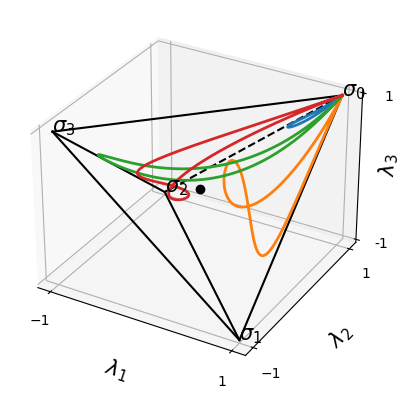

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')


    
ax.plot([1,1],[1,-1],[1,-1],'k')
ax.plot([1,-1],[1,1],[1,-1],'k--')
ax.plot([1,-1],[1,-1],[1,1],'k')
ax.plot([-1,1],[1,-1],[-1,-1],'k')
ax.plot([-1,-1],[1,-1],[-1,1],'k')
ax.plot([1,-1],[-1,-1],[-1,1],'k')
    #     plt.plot(0,0,0,'ko')

ax.text(1,1,1,'$\sigma_0$',size=15)
ax.text(1,-1,-1,'$\sigma_1$',size=15)
ax.text(-1,1,-1,'$\sigma_2$',size=15)
ax.text(-1,-1,1,'$\sigma_3$',size=15)
plt.plot(0,0,0,'ko')
#     ax.text(0,0,0,'O',size=20)

ax.set_xlabel(r'$\lambda_1$', fontsize=15)
ax.set_ylabel(r'$\lambda_2$',fontsize=15)


plt.xticks([-1,1],fontsize=10)
plt.yticks([-1,1],fontsize=10)
ax.set_zticks([-1, 1])
ax.set_zticklabels([-1,1],fontsize=10)
ax.set_zlabel(r'$\lambda_3$', fontsize=15, rotation = 0)
ax.zaxis.labelpad=-8.0 # <- change the value here

# ax.view_init(10,295)


np.random.seed(15)
    

for i in range(4):
    mu = np.random.random()*np.pi/2
    nu = np.random.random()*np.pi/2
    theta = np.random.random()*2*np.pi

    phi1 = np.random.random()*np.pi
    phi2 = np.random.random()*np.pi
    phi3 = np.random.random()*np.pi
    phi4 = np.random.random()*np.pi
    phi5 = np.random.random()*np.pi*2

    xi1 = np.random.random()*np.pi
    xi2 = np.random.random()*np.pi
    xi3 = np.random.random()*np.pi*2

    U = matrizU([mu,nu,theta,phi1,phi2,phi3,phi4,phi5,xi1,xi2,xi3])

    norma = np.sin(nu)*np.cos(mu)
    normb = np.sin(nu)*np.sin(mu)
    normc = np.cos(nu)


    # Definimos los vectores c,a,b    
    c = U@np.array([0,0,normc,0])    
    b = U@np.array([0,normb,0,0])
    a = U@np.array([norma,0,0,0])

    
    lambdas1,lambdas2,lambdas3 = lamb_abc(a,b,c)


    plt.plot(lambdas1,lambdas2,lambdas3,linewidth=2)



plt.show()



